In [35]:
#http://www.weeklystandard.com/weblogs/TWSFP/2009/07/sexist_in_chief.asp

from ggplot import *
import pandas as pd
import numpy as np
%matplotlib inline

In [36]:
df = pd.read_csv('./data/2015_WH_pay_links_merged_edited.csv')
df.loc[df.Gender=='?','Gender'] = np.nan
df = df[ pd.notnull(df['Gender']) ]

## Segmenting the salaries into high, med, low

In [37]:
bins = np.linspace(df.Salary.min(), df.Salary.max(), 20)
groups = df.groupby(np.digitize(df.Salary, bins))
sex_count = pd.DataFrame(groups['Gender'].value_counts(), columns=['Quantity'])

In [38]:
df['Salary_Category'] = '$150k+'
df.loc[ (df.Salary>80000) & (df.Salary<150000), 'Salary_Category'] = '$150 - 80k'
df.loc[ df.Salary<80000, 'Salary_Category'] = '0 - $80k'
    
merged = df.groupby(['Salary_Category', 'Gender']).agg([np.mean, np.median, len])
merged = merged.sort([('Salary', 'mean')], ascending=False)

In [39]:
merged['Salary','mean'] = merged['Salary','mean'].astype(int)

merged = merged.rename(columns = {'newname':'# of employees'})
merged

Salary             
                          mean  median  len
Salary_Category Gender                     
$150k+          male    157012  160085   30
                female  156186  167600   24
$150 - 80k      male    115028  114305   72
                female  111021  113000   82
0 - $80k        female   54634   52454  157
                male     54020   50500  103

In [40]:
df.groupby('Gender').agg([np.mean, len])

Salary     
         mean  len
Gender            
female  81482  263
male    90519  205

## The difference in average salaries

In [34]:
df.groupby('Gender').agg([len, np.mean, np.median])
print 'average (all)', float(81482)/90519
print 'average (>$80k)', float(122448)/128812


print 'median (all)', float(65650)/78592
print 'median (>$80k)', float(116150)/125000

average (all) 0.900164606326
average (>$80k) 0.950594665093
median (all) 0.835326750814
median (>$80k) 0.9292


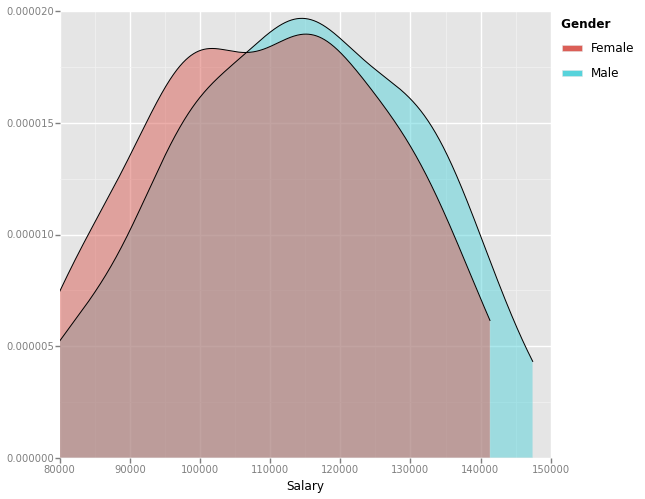

<ggplot: (279658669)>

In [17]:
#ggplot(df, aes(x='Salary', fill='Gender')) + geom_histogram(alpha=0.75, binwidth=10000)
ggplot(df[ (df['Salary']<150000) & (df['Salary']>=80000)], aes(x='Salary', fill='Gender')) + geom_density(alpha=0.5)
#ggplot(df, aes(x='Salary', fill='Gender')) + geom_density(alpha=0.5)

In [27]:
df[ (df['Salary']>80000) ].groupby('Gender').agg([len, np.mean, np.median])

Salary                
          len    mean  median
Gender                       
female    103  122448  116150
male       99  128812  125000

In [32]:
print 'average', float(122448)/128812
print 'median', float(116150)/125000

average 0.950594665093
median 0.9292


In [179]:
df.loc[ df['Est_Age']=='unknown'] = np.nan

In [197]:
df.Est_Age = df.Est_Age.astype(float)

In [198]:
ggplot(df[ (df['Salary']<50000) & (df['Est_Age']!='unknown') ], aes('Est_Age', fill='Gender')) + geom_density(alpha=0.5)

TypeError: invalid type comparison

In [147]:
df.groupby('Gender').agg([len, np.median, np.mean])

Salary              
          len median   mean
Gender                     
female    263  65650  81482
male      205  78592  90519

In [4]:
df_interns = pd.read_csv('Interns_combined.csv')

In [5]:
intern_names = df_interns['Cleaned_Names']

In [6]:
wh_names = df['Cleaned_Name']

In [160]:
intern2wh = set(intern_names) & set(wh_names)

In [158]:
df[list(intern2wh)

['blaine boyd',
 'glorie chiza',
 'ryan robinson',
 'caroline mckay',
 'summer burglass',
 'alexander preve',
 'austin lin',
 'angelica allen',
 'vincent amendolare',
 'debbie thomas']

In [164]:
df[df['Cleaned_Name'].isin(intern2wh)]

,Name,Status,Salary,Pay_Basis,Gender,Cleaned_Name,Checked,Ref,Grad_Date,Est_Age,Position_Title
231,"Allen, Angelica P.",Employee,50000,Per Annum,female,angelica allen,x,https://www.linkedin.com/pub/angelica-allen/71...,2010,27,SPECIAL ASSISTANT TO THE DIRECTOR OF THE OFFIC...
235,"Boyd, Blaine A.",Employee,50000,Per Annum,male,blaine boyd,x,http://newsok.com/oklahoma-student-is-michelle...,2014,23,DIRECTOR OF CORRESPONDENCE FOR THE FIRST LADY
240,"McKay, Caroline M.",Employee,42000,Per Annum,female,caroline mckay,x,https://www.linkedin.com/pub/caroline-mckay/22...,2014,23,STAFF ASSISTANT
298,"Robinson, Ryan S.",Detailee,65847,Per Annum,male,ryan robinson,x,https://www.linkedin.com/in/ryansrobinson,2005,32,ASSOCIATE DIRECTOR OF PUBLIC ENGAGEMENT
309,"Burglass, Summer A.",Employee,52000,Per Annum,female,summer burglass,x,https://www.linkedin.com/pub/summer-burglass/7...,2013,24,ASSOCIATE DIRECTOR OF WHITE HOUSE PERSONNEL
317,"Amendolare, Vincent C.",Employee,42420,Per Annum,male,vincent amendolare,x,https://www.linkedin.com/pub/vincent-amendolar...,2012,25,ANALYST
331,"Preve, Alexander W.",Employee,42420,Per Annum,male,alexander preve,x,https://www.linkedin.com/pub/alexander-preve/7...,2014,23,ANALYST
349,"Lin, Austin Y.",Employee,52000,Per Annum,male,austin lin,x,https://www.linkedin.com/in/austinylin,2014,23,ASSOCIATE DIRECTOR FOR OPERATIONS
366,"Thomas, Debbie A.",Employee,50000,Per Annum,female,debbie thomas,x,https://www.linkedin.com/pub/debbie-thomas/77/...,2013,24,SENIOR WRITER
382,"Chiza, Glorie B.",Employee,42420,Per Annum,male,glorie chiza,x,https://www.linkedin.com/pub/glorie-chiza/58/a...,2013,24,STAFF ASSISTANT


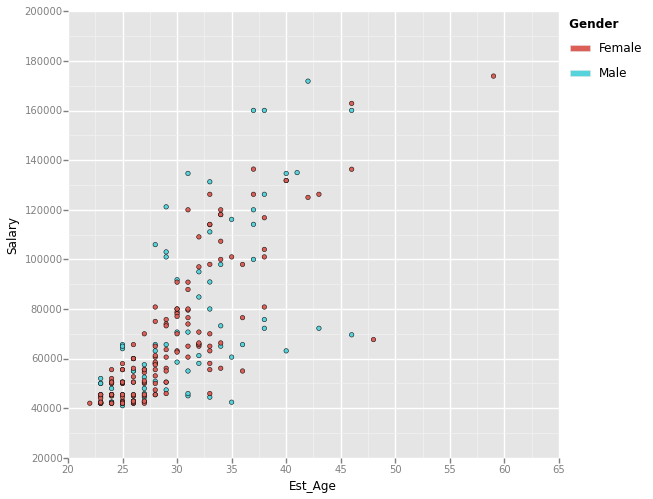

<ggplot: (286390921)>

In [8]:
ggplot(df[(df['Est_Age']!='unknown')], aes('Est_Age','Salary', fill='Gender')) + geom_point()

In [13]:
M = df['Gender']=='male'
F = df['Gender']=='female'

In [16]:
Mjobs = df[ (df['Salary']<80000) & M].Position_Title
Fjobs = df[ (df['Salary']<80000) & F].Position_Title


In [44]:
def check_alphnum(char):
    char = ord(char)
    if (char >= 48) & (char <= 57):
        return True
    elif (char >= 65) & (char <= 90):
        return True
    elif (char >= 97) & (char <= 122):
        return True
    elif char == 32:
        return True
    else:
        return False
    
def check_word(word):
    return "".join([char for char in word if check_alphnum(char)])

In [75]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stop = stopwords.words('english')
df['Titles'] = df['Position_Title'].str.split().apply(lambda x: [item.lower() for item in x if item.lower() not in stop])
df['Titles'] = df['Titles'].apply(lambda sentence: [check_word(word) for word in sentence])
df['Titles'] = df['Titles'].apply(lambda x: " ".join(x))


vectorizer = CountVectorizer(analyzer = 'word',
                            ngram_range = (1,4),
                            max_features = 5000)
Xts = vectorizer.fit_transform(df['Titles'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [76]:
from scipy import sparse
sex = df['Gender'].apply(lambda x: 0 if x=='male' else 1).astype(int)


In [95]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xts, sex)
preds = model.predict_proba(Xts)


In [80]:
from sklearn import metrics, cross_validation
def model_eval(y_cv, preds):
	#auc_data = sum(cv_preds & y_cv)/float(len(cv_preds))
	#auc_data = metrics.f1_score(y_cv, cv_preds)

	fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
	return metrics.auc(fpr, tpr)

In [12]:
df.Position_Title.value_counts()

STAFF ASSISTANT                                                                                                                     21
SENIOR POLICY ADVISOR                                                                                                               17
ANALYST                                                                                                                             14
INFORMATION SERVICES OPERATOR                                                                                                       12
RECORDS MANAGEMENT ANALYST                                                                                                          10
ASSOCIATE DIRECTOR OF PUBLIC ENGAGEMENT                                                                                              8
SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT                                                            8
POLICY ASSISTANT                                       

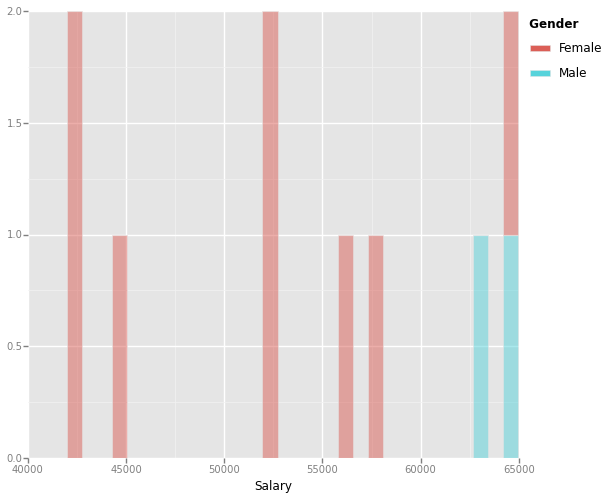

<ggplot: (287065761)>

In [25]:
ggplot(df[ df['Position_Title']=='RECORDS MANAGEMENT ANALYST'], aes('Salary', fill='Gender')) + geom_histogram(alpha =0.5)

In [24]:
df[ df['Salary']<80000]

,Name,Status,Salary,Pay_Basis,Gender,Cleaned_Name,Checked,Ref,Grad_Date,Est_Age,Position_Title
0,"Bray, Alan R.",Employee,50500,Per Annum,male,alan bray,x,NaN,unknown,unknown,ADVANCE LEAD
1,"Keeney, Andrew J.",Employee,45905,Per Annum,male,andrew keeney,x,NaN,unknown,unknown,COORDINATOR
2,"Edmonds, Anita J.",Employee,57934,Per Annum,female,anita edmonds,x,NaN,unknown,unknown,RECORDS MANAGEMENT ANALYST
3,"Gwynn, II, Artemus R.",Employee,45928,Per Annum,male,artemus gwynn,x,NaN,unknown,unknown,INFORMATION SERVICES OPERATOR
4,"Gillum, Bria L.",Employee,51005,Per Annum,female,bria gillum,x,NaN,unknown,unknown,POLICY ASSISTANT
5,"DeGuzman, Brian K.",Employee,65000,Per Annum,male,brian deguzman,x,NaN,unknown,unknown,DIRECTOR OF THE WHITE HOUSE SWITCHBOARD
6,"Roberts, Brian D.",Employee,60000,Per Annum,male,brian roberts,x,NaN,unknown,unknown,DIRECTOR FOR CORRESPONDENCE SYSTEMS INNOVATION
7,"Young, Caitlin E.",Employee,63630,Per Annum,female,caitlin young,x,NaN,unknown,unknown,STENOGRAPHER
8,"Poese, Caroline S.",Employee,42420,Per Annum,female,caroline poese,x,NaN,unknown,unknown,RECORDS MANAGEMENT ANALYST
9,"Millison, Chad L.",Employee,64955,Per Annum,male,chad millison,x,NaN,unknown,unknown,RECORDS MANAGEMENT ANALYST
